In [1]:
# !pip install opencv-python

import os
import glob
import cv2
import math
import matplotlib.pyplot as plt


im_folder_path = '../image_dataset/'
ann_file = 'anns.txt'

In [2]:
# Load file names and annotations
def parse_line(line_str):
    data = []
    str_list = line_str.split() # image name - x - y - w - h - angle
    if len(str_list) < 6:
        return []

    data.append(str_list[0])
    data.extend(float(x) for x in str_list[1:])

    return data


# Load image names from image folder
im_names = []
for ext in ['png', 'jpg']:
    im_names += [os.path.basename(im_path) for im_path in glob.glob(im_folder_path + '*' + ext)]

# Read annotation file
anns = []
try:
    with open(im_folder_path + ann_file, 'r') as f:
        anns = [parse_line(line.rstrip()) for line in f]
except:
    print('File doesn\'t exist')

In [3]:
# Rotate image around its center
def rotate_image(mat, angle):
    height, width = mat.shape[:2]
    image_center = (width / 2, height / 2)

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1)

    radians = math.radians(angle)
    sin = math.sin(radians)
    cos = math.cos(radians)
    bound_w = int((height * abs(sin)) + (width * abs(cos)))
    bound_h = int((height * abs(cos)) + (width * abs(sin)))

    rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
    rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat    

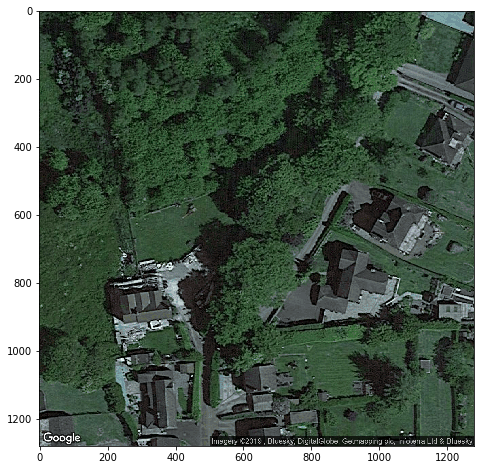

In [9]:
# Crop images from rectangles
def crop_rect(im, rect):
    rect = [int(x) for x in rect]
    x, y, w, h, angle = rect
    # Angle in the PyQT QTransform is calculated in the invert direction with the angle of rotation in OpenCV
    rotated_im = rotate_image(im, -angle)
    patch = rotated_im[y:y+h,x:x+w,:]
    return patch

im_name = anns[0][0]
# Load image
im = cv2.imread(im_folder_path + im_name)

plt.figure(figsize=(8,8))
plt.imshow(im)

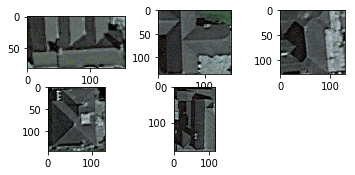

In [15]:
# Read rectangles' parameters
im_rects = [ann[1:] for ann in anns if ann[0]==im_name]
# Cropping
patches = [crop_rect(im, rect) for rect in im_rects]

# Display cropped patches
for i in range(0, len(patches)):
    plt.subplot(3,3,1+i)
    plt.imshow(patches[i])